# Proyek Analisis Data: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

- How do weather conditions impact the total number of bike rentals on a daily/hourly basis?
- Can we predict the number of bike rentals based on seasonal and temporal factors?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

day_data = pd.read_csv('/content/drive/MyDrive/Bike Sharing Dataset/day.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/Bike Sharing Dataset/hour.csv')

print(day_data.info())
print(hour_data.info())

print(day_data.head())
print(hour_data.head())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entrie

**Insight:** \
Data dari file CSV diatas hampir memiliki atribut yang sama persis, yaitu :
- instant: index
- dteday : tanggal peminjaman sepeda
- season : musim (1:Musim Semi, 2:Musim Panas, 3:Musim Gugur, 4:Musim Salju)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan (1 hingga 12)
- holiday : hari libur
- weekday : hari dalam seminggu
- workingday : hari kerja (jika hari kerja nilainya 1, jika libur nilainya 0)
- weathersit : keadaan cuaca (1:Cerah atau Berawan, 2:Kabut, 3:Salju atau Hujan ringan, 4:Hujan atau salju berat)
- temp: Suhu dalam Celcius
- atemp: Suhu yang yang dirasakan dalam Celsius.
- hum: Kelembaban yang dinormalkan. Nilainya dibagi menjadi 100 (maks)
- windspeed: Kecepatan angin yang dinormalkan. Nilainya dibagi menjadi 67 (maks)
- casual: jumlah peminjam sepeda biasa, yang tidak berlangganan
- registered: jumlah peminjam sepeda yang terdaftar keanggotaan
- cnt: total jumlah peminjam sepeda (total peminjam sepeda baik itu casual ataupun registered)

Perbedaan terdapat pada file hour.csv yang memiliki tambahan atribut : \
- hr : jam (0 hingga 23)

### Assessing Data

Data Descriptive Statistic

In [3]:
print(day_data.describe())
print(hour_data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Data Variation

In [4]:
print(day_data.nunique())
print(hour_data.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


Data Missing Values

In [5]:
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Data Duplicate

In [6]:
print(day_data.duplicated().sum())
print(hour_data.duplicated().sum())

0
0


**Insight:** \
Data yang akan kita gunakan sudah normal tanpa memiliki nilai nilai yang kurang, hilang maupun rusak

### Cleaning Data

Change Data Type object to Data Type date time on the 'dteday'

In [7]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**  \
Mengubah bentuk dari kolom 'dteday' menjadi datetime supaya dapat digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

Summary Statistics

In [8]:
print(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe())

print(hour_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe())

             temp       atemp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486  4504.348837
std      0.183051    0.162961    0.142429    0.077498  1937.211452
min      0.059130    0.079070    0.000000    0.022392    22.000000
25%      0.337083    0.337842    0.520000    0.134950  3152.000000
50%      0.498333    0.486733    0.626667    0.180975  4548.000000
75%      0.655417    0.608602    0.730209    0.233214  5956.000000
max      0.861667    0.840896    0.972500    0.507463  8714.000000
               temp         atemp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098    189.463088
std        0.192556      0.171850      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      0.000000      1.000000
25%        0.3400

Correlation Analysis

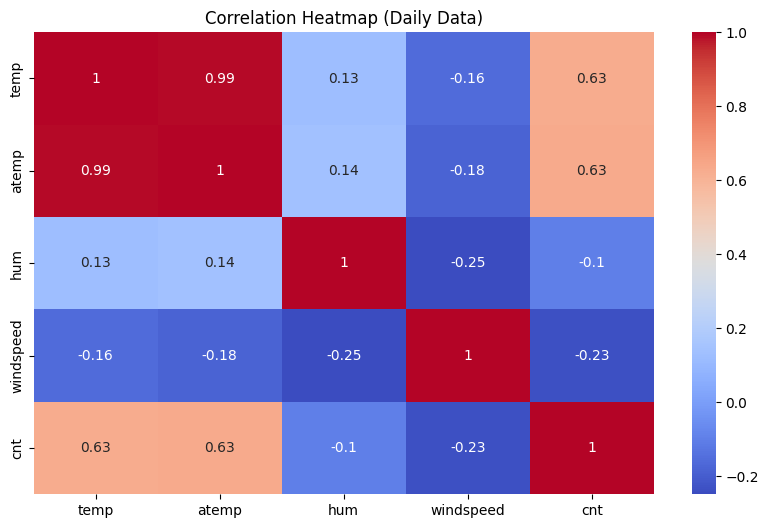

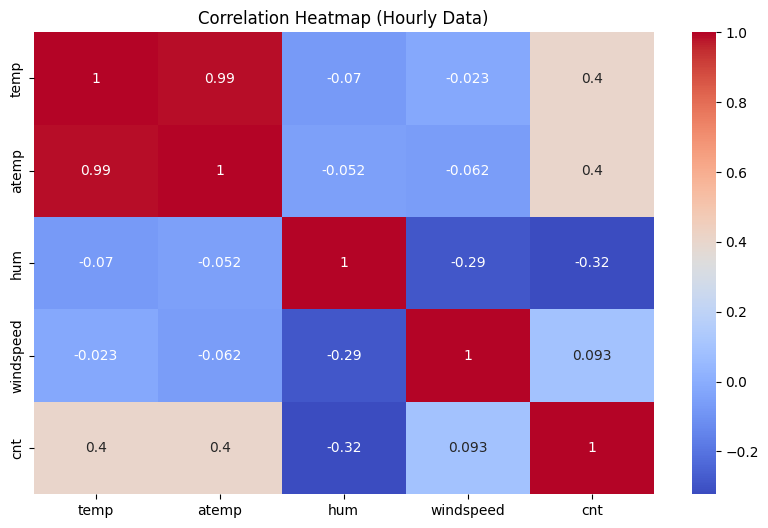

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Daily Data)')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(hour_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Hourly Data)')
plt.show()

### Explore ...

Average Bike Rentals by Season

In [10]:
seasonal_rentals_daily = day_data.groupby('season')['cnt'].mean()
seasonal_rentals_hourly = hour_data.groupby('season')['cnt'].mean()

print(seasonal_rentals_daily)
print(seasonal_rentals_hourly)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


Average Bike Rentals by Time Segment

In [11]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

hour_data['time_segment'] = hour_data['hr'].apply(time_of_day)

time_segment_clusters = hour_data.groupby('time_segment')['cnt'].mean()

print(time_segment_clusters)

time_segment
Afternoon    262.244719
Evening      356.201441
Morning      181.520583
Night         65.687968
Name: cnt, dtype: float64


Average Bike Rentals by Weekday

In [12]:
weekday_rentals_daily = day_data.groupby('weekday')['cnt'].mean()
weekday_rentals_hourly = hour_data.groupby('weekday')['cnt'].mean()

print(weekday_rentals_daily)
print(weekday_rentals_hourly)

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

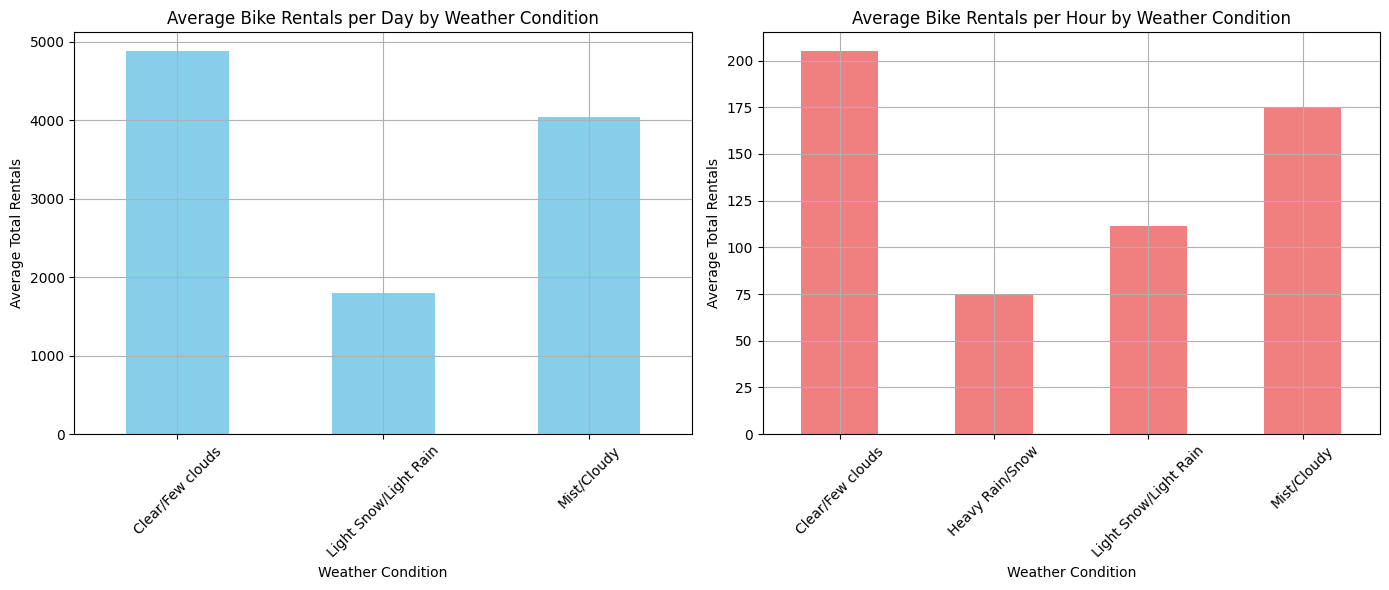

In [13]:
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Snow'
}

day_data['weather_label'] = day_data['weathersit'].map(weather_labels)
hour_data['weather_label'] = hour_data['weathersit'].map(weather_labels)

daily_weather_clusters = day_data.groupby('weather_label')['cnt'].mean()
hourly_weather_clusters = hour_data.groupby('weather_label')['cnt'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
daily_weather_clusters.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals per Day by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_weather_clusters.plot(kind='bar', color='lightcoral')
plt.title('Average Bike Rentals per Hour by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

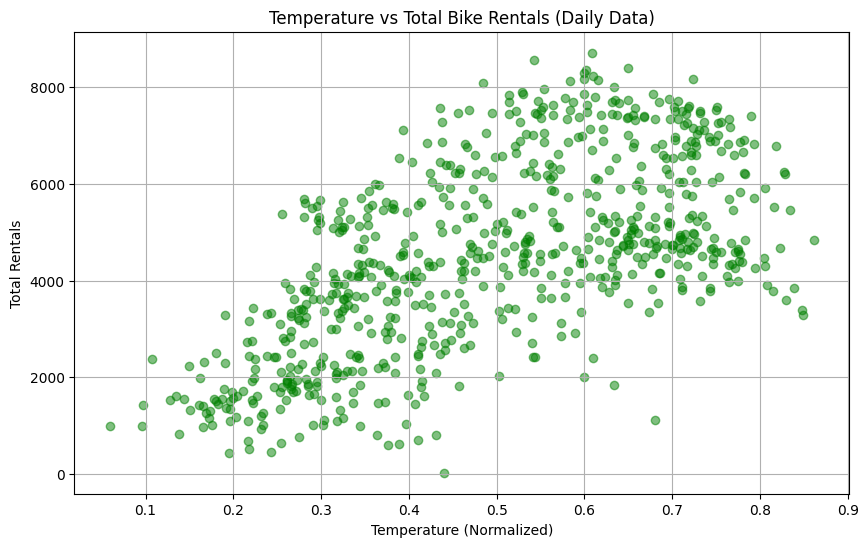

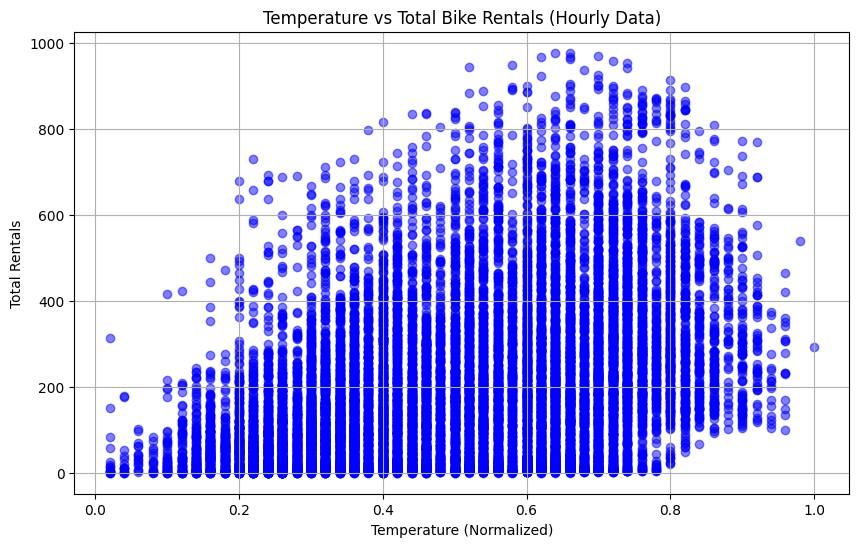

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(day_data['temp'], day_data['cnt'], alpha=0.5, color='green')
plt.title('Temperature vs Total Bike Rentals (Daily Data)')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(hour_data['temp'], hour_data['cnt'], alpha=0.5, color='blue')
plt.title('Temperature vs Total Bike Rentals (Hourly Data)')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

### Pertanyaan 2:

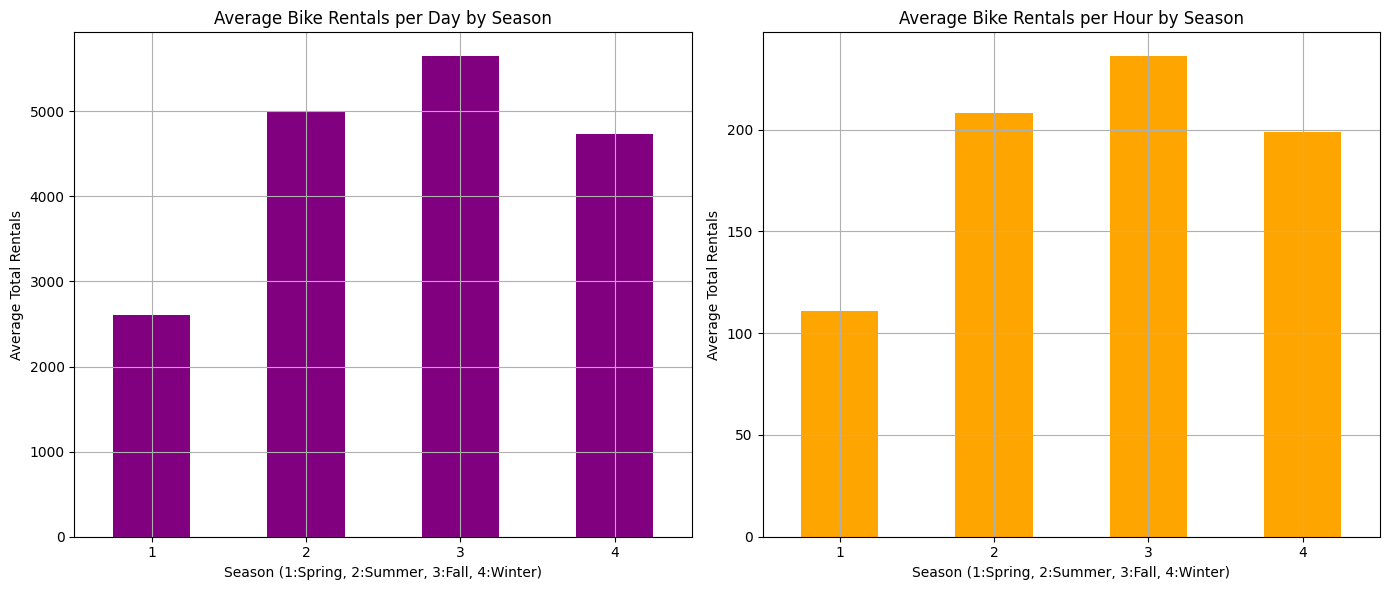

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
seasonal_rentals_daily.plot(kind='bar', color='purple')
plt.title('Average Bike Rentals per Day by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=0)
plt.grid(True)

plt.subplot(1, 2, 2)
seasonal_rentals_hourly.plot(kind='bar', color='orange')
plt.title('Average Bike Rentals per Hour by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

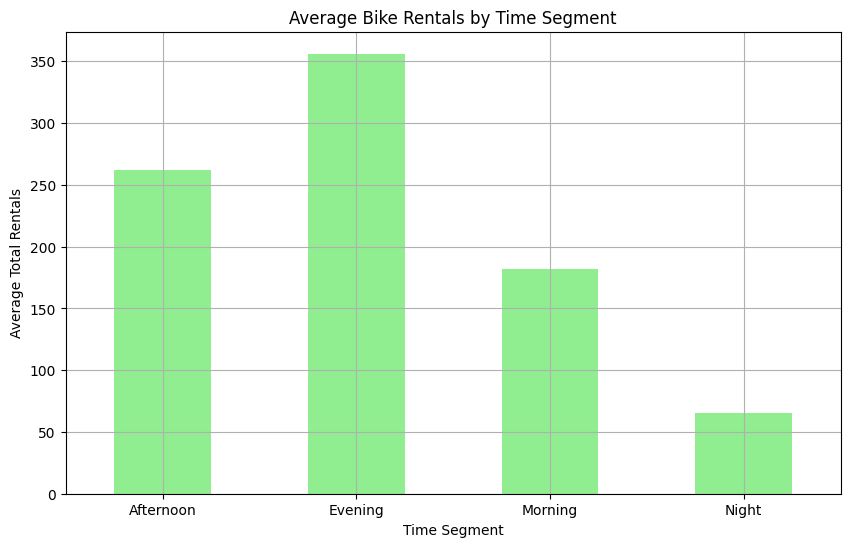

In [16]:
plt.figure(figsize=(10, 6))
time_segment_clusters.plot(kind='bar', color='lightgreen')
plt.title('Average Bike Rentals by Time Segment')
plt.xlabel('Time Segment')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

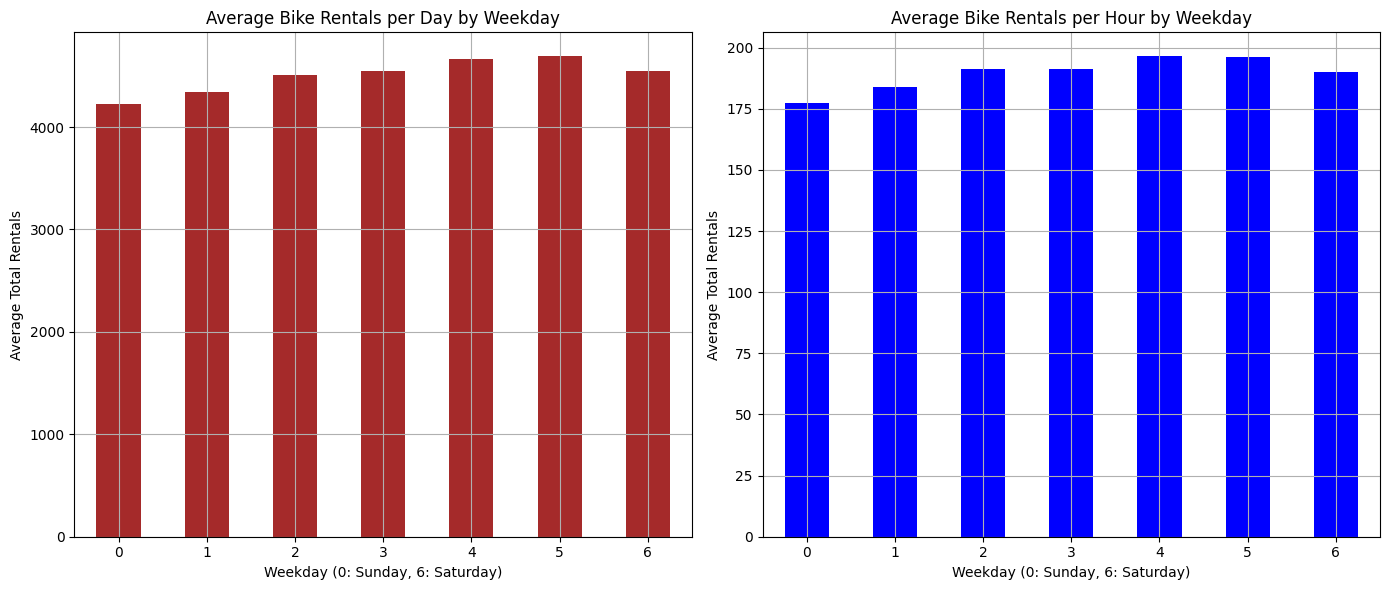

In [17]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
weekday_rentals_daily.plot(kind='bar', color='brown')
plt.title('Average Bike Rentals per Day by Weekday')
plt.xlabel('Weekday (0: Sunday, 6: Saturday)')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=0)
plt.grid(True)

plt.subplot(1, 2, 2)
weekday_rentals_hourly.plot(kind='bar', color='blue')
plt.title('Average Bike Rentals per Hour by Weekday')
plt.xlabel('Weekday (0: Sunday, 6: Saturday)')
plt.ylabel('Average Total Rentals')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : \
Weather conditions significantly impact the total number of bike rentals on both a daily and hourly basis. Clear, sunny weather and higher temperatures are associated with increased bike usage, as people are more likely to engage in outdoor activities during favorable weather. On the other hand, adverse weather conditions, such as heavy rain, snow, and higher wind speeds, lead to a noticeable drop in bike rentals. The analysis showed that temperature has a strong positive correlation with bike rentals, meaning warmer days see more rentals, while humidity and windspeed, though less influential, exhibit a slight negative correlation, indicating a decrease in rentals under these conditions. This highlights that favorable weather plays a pivotal role in driving higher bike rental activity, while unfavorable weather conditions reduce outdoor mobility and consequently bike rentals.
- Conclution pertanyaan 2 : \
Bike rentals can indeed be predicted based on seasonal and temporal factors, as clear patterns emerge in relation to the time of year, day, and specific hours. The highest number of bike rentals occurs during the warmer seasons, particularly in the summer and fall, when outdoor activities are most appealing. Conversely, winter sees a steep decline in rentals due to cold and less favorable weather conditions. Temporal factors also show predictable patterns, with rentals peaking during morning and evening hours, reflecting heavy use for commuting purposes during weekdays. Weekdays generally have higher rental counts than weekends, emphasizing that bike-sharing is frequently used for work commutes. These clear temporal trends demonstrate the predictable nature of bike rentals, heavily influenced by both the time of day and the season, which allows for effective forecasting of demand and resource planning.